<a href="https://colab.research.google.com/github/Udara380/Diabetes_assignipynb.ipynb/blob/main/Diabetes_assignipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Tute ML")

In [ ]:
import pandas as pd

In [ ]:
diabetes = pd.read_csv("/content/drive/MyDrive/Tute ML/ML data/diabetes_prediction_dataset_2.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65638 entries, 0 to 65637
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               65638 non-null  object 
 1   age                  65638 non-null  float64
 2   hypertension         65638 non-null  int64  
 3   heart_disease        65638 non-null  int64  
 4   smoking_history      65638 non-null  object 
 5   bmi                  65638 non-null  float64
 6   HbA1c_level          65638 non-null  float64
 7   blood_glucose_level  65638 non-null  int64  
 8   diabetes             65638 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.5+ MB


In [ ]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,65638.000000,65638.000000,65638.000000,65638.000000,65638.000000,65638.000000,65638.000000
mean,46.850975,0.099561,0.049270,28.478539,5.594814,140.885478,0.129498
std,19.580220,0.299416,0.216433,6.541776,1.113641,43.434155,0.335753
min,0.160000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,31.000000,0.000000,0.000000,24.680000,4.800000,100.000000,0.000000
50%,47.000000,0.000000,0.000000,27.320000,5.800000,145.000000,0.000000
75%,62.000000,0.000000,0.000000,31.150000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,91.820000,9.000000,300.000000,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

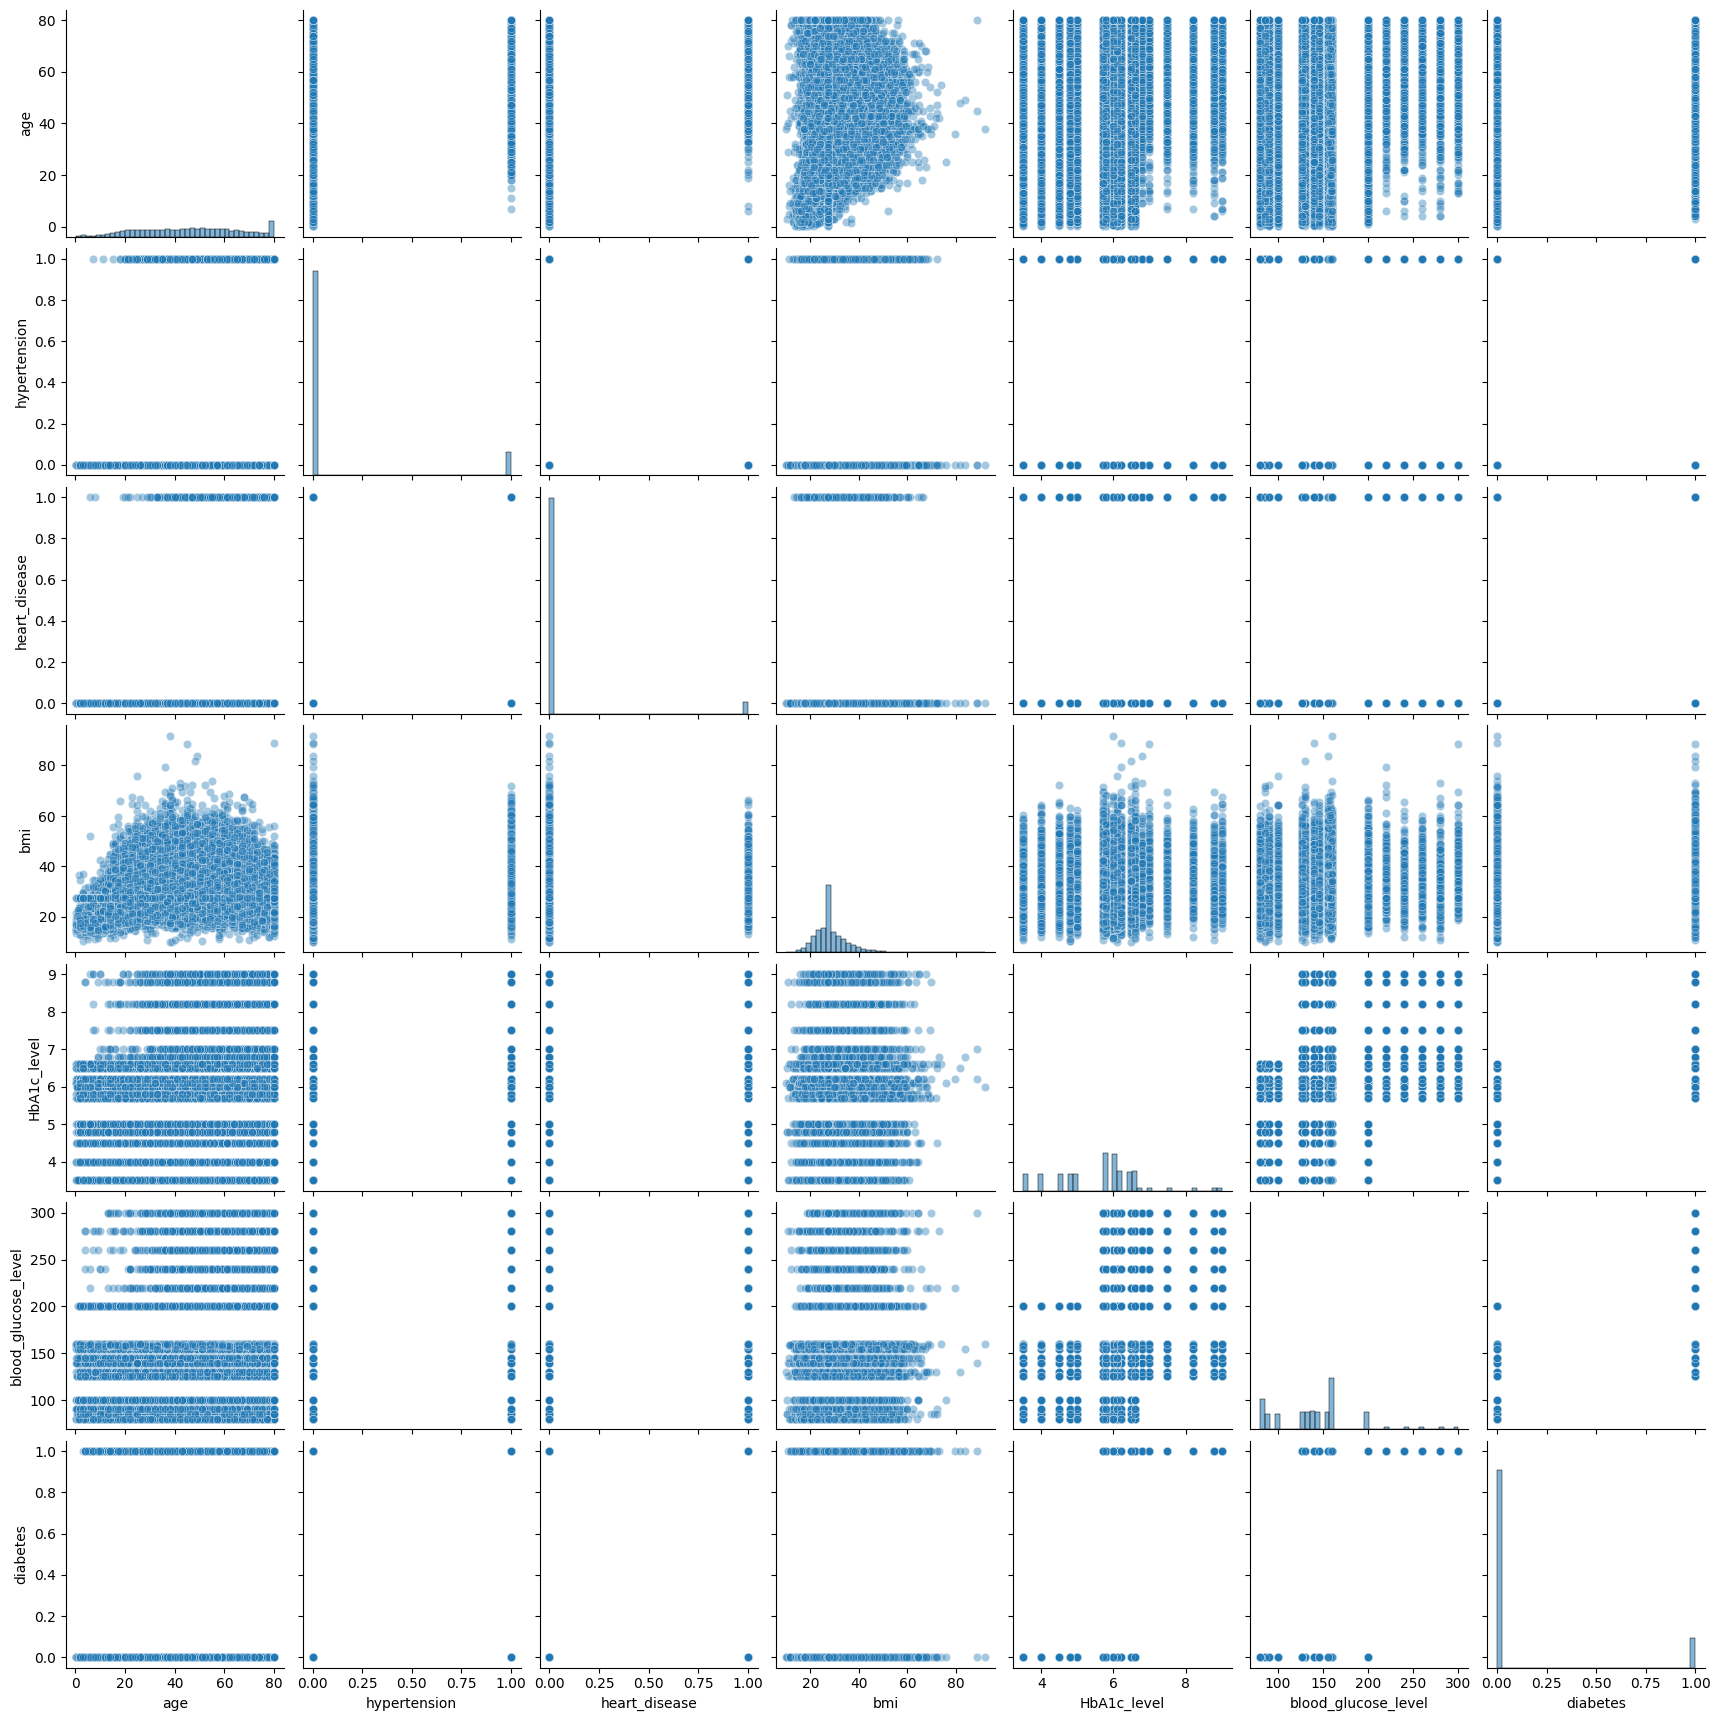

In [ ]:
sns.pairplot(diabetes,
             kind='scatter',
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55, 'bins':40})

In [ ]:
features = diabetes.columns.drop('diabetes').tolist()

IndexError: index 6 is out of bounds for axis 0 with size 6

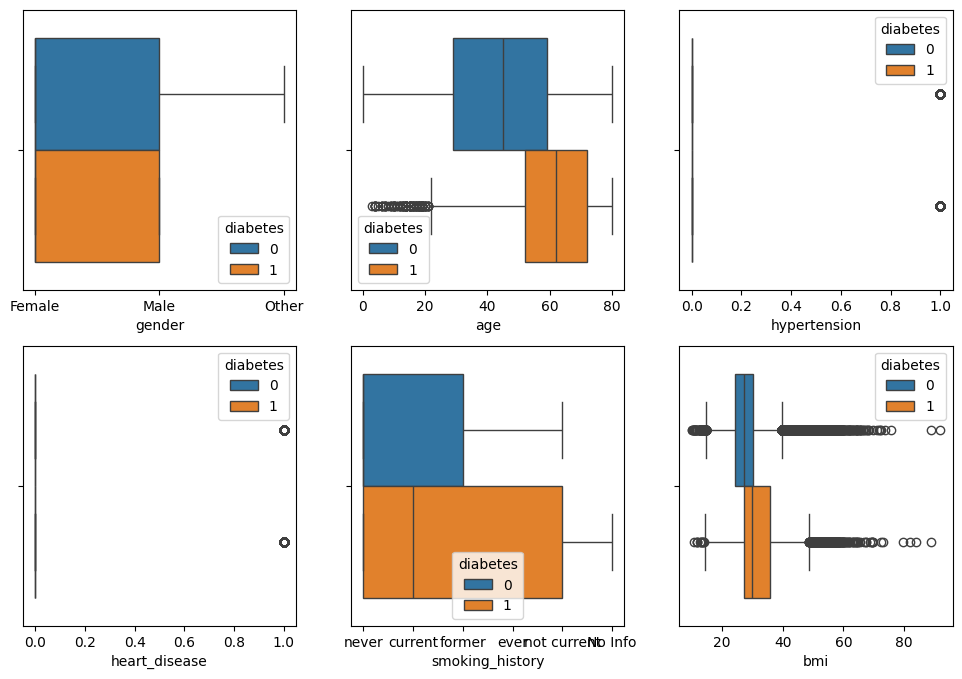

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
axs = axs.flatten()

for index, feature in enumerate(features):
  sns.boxplot(data=diabetes, x=feature, hue='diabetes', ax=axs[index])

# Set the 6th subplot as invisible
axs[4].set_visible(False)
plt.show()

In [ ]:
corr_matrix = diabetes.corr()

<ipython-input-12-27e53b2ee576>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = diabetes.corr()


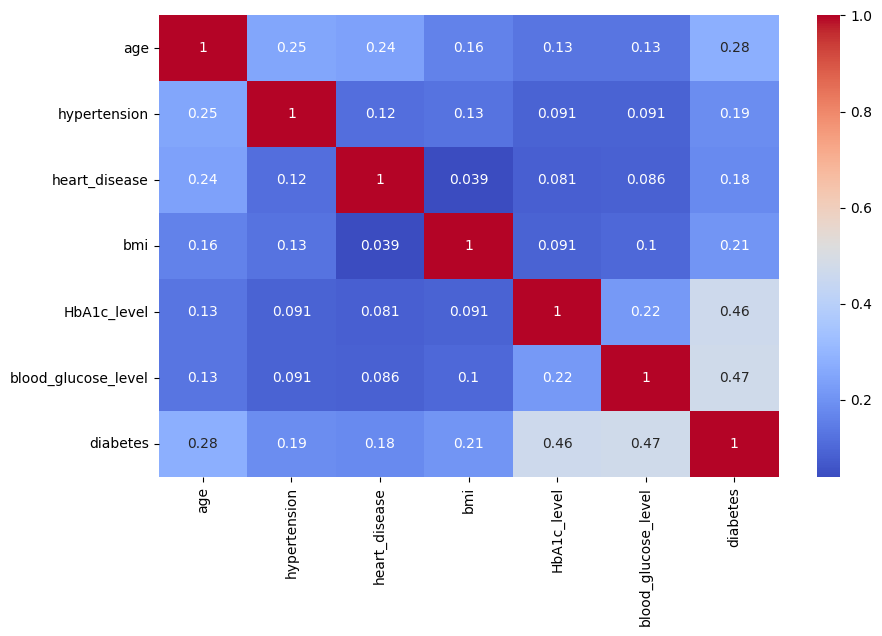

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separate features (X) and target variable (y)
X = diabetes.drop(columns=['diabetes'])  # Features
y = diabetes['diabetes']  # Target variable

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
missing_values = diabetes.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:


data_encoded = diabetes.copy()
data_encoded = pd.get_dummies(data_encoded, columns=["smoking_history", "gender"])
print("Encoded Dataset:")
print(data_encoded.head())


Encoded Dataset:
    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  28.0             0              0  27.32          5.7                  158   
2  36.0             0              0  23.45          5.0                  155   
3  76.0             1              1  20.14          4.8                  155   
4  20.0             0              0  27.32          6.6                   85   

   diabetes  smoking_history_No Info  smoking_history_current  \
0         0                        0                        0   
1         0                        0                        0   
2         0                        0                        1   
3         0                        0                        1   
4         0                        0                        0   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                     0        

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data_encoded.drop("diabetes", axis=1)
y = data_encoded["diabetes"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (52510, 15) (52510,)
Testing Set Shape: (13128, 15) (13128,)


In [ ]:
y.value_counts(normalize=True)

0    0.870502
1    0.129498
Name: diabetes, dtype: float64

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_log_reg

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
log_reg.feature_names_in_

array(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current', 'gender_Female', 'gender_Male',
       'gender_Other'], dtype=object)

In [ ]:
log_reg.coef_

array([[ 0.0225989 ,  2.11388319,  1.88015911,  0.05672887,  1.51307805,
         0.02965336,  5.1273291 , -3.77801279, -2.53367219, -3.51491992,
        -2.81795625, -3.32073561, -5.77594259, -5.03638099, -0.02564408]])

In [ ]:
lr_base_coef_df = pd.DataFrame({'feature':log_reg.feature_names_in_ , 'lr_coef':log_reg.coef_[0]})
lr_base_coef_df

,feature,lr_coef
0,age,0.022599
1,hypertension,2.113883
2,heart_disease,1.880159
3,bmi,0.056729
4,HbA1c_level,1.513078
5,blood_glucose_level,0.029653
6,smoking_history_No Info,5.127329
7,smoking_history_current,-3.778013
8,smoking_history_ever,-2.533672
9,smoking_history_former,-3.514920


In [ ]:
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


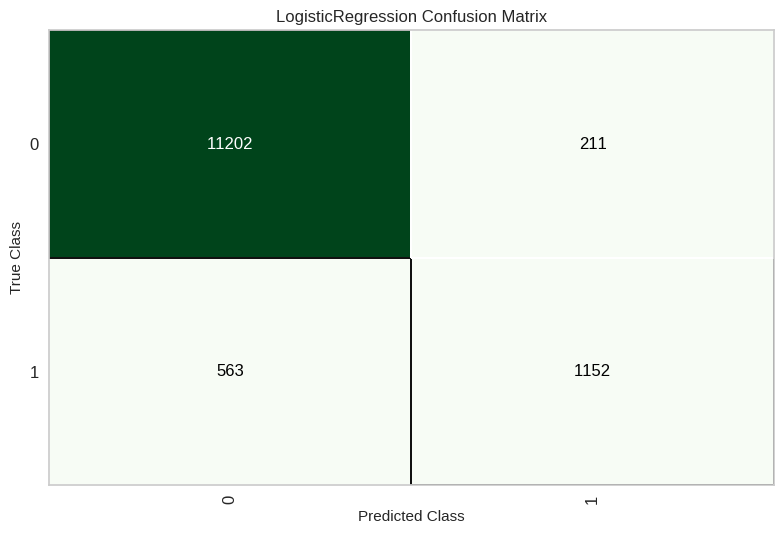

In [ ]:
conf_matrix_log_reg_base = confusion_matrix(log_reg, X_test, y_test, cmap="Greens")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


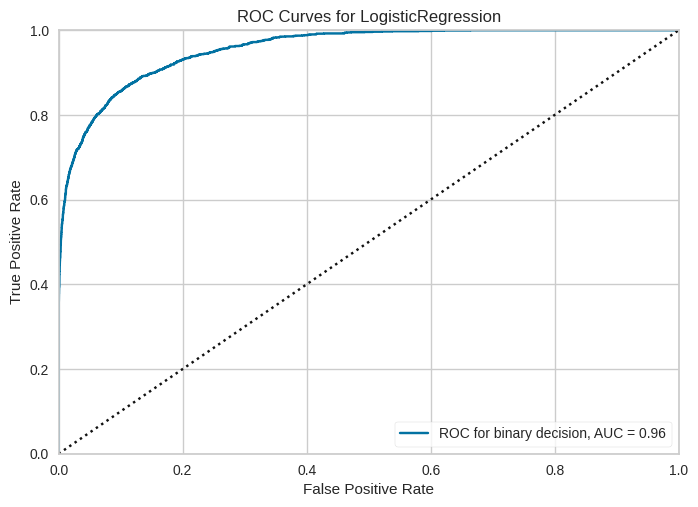

In [ ]:
roc_log_reg_base = roc_auc(log_reg, X_test, y_test, binary=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_logistic_regression = accuracy_score(y_test, y_pred_log_reg)
precision_logistic_regression = precision_score(y_test, y_pred_log_reg)
recall_logistic_regression = recall_score(y_test, y_pred_log_reg)
f1_logistic_regression = f1_score(y_test, y_pred_log_reg)

print("Performance Metrics for Logistic Regression:")
print("Accuracy:", accuracy_logistic_regression)
print("Precision:", precision_logistic_regression)
print("Recall:", recall_logistic_regression)
print("F1-score:", f1_logistic_regression)


Performance Metrics for Logistic Regression:
Accuracy: 0.9410420475319927
Precision: 0.8451944240645635
Recall: 0.6717201166180758
F1-score: 0.7485380116959064


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [ ]:
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

print("Performance Metrics for Random Forest:")
print("Accuracy:", accuracy_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)
print("F1-score:", f1_random_forest)

Performance Metrics for Random Forest:
Accuracy: 0.9608470444850701
Precision: 0.9587471352177235
Recall: 0.7317784256559767
F1-score: 0.8300264550264551


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print(conf_matrix_random_forest)

[[11359    54]
 [  460  1255]]


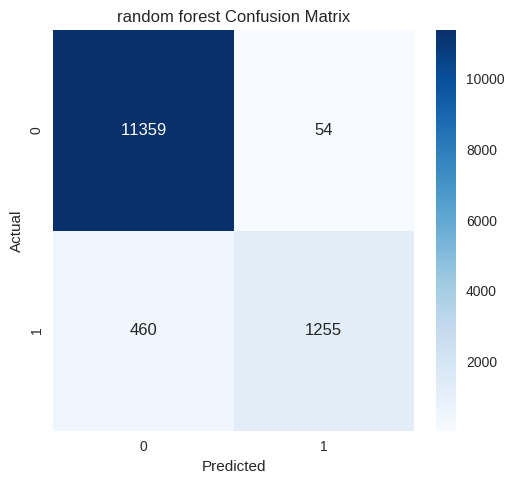

In [ ]:
import seaborn as sns

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_random_forest, annot=True, cmap='Blues', fmt='g')
plt.title('random forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:

scory_prob_random_forest = random_forest.predict_proba(X_test)[:,1]
fpr_random_forest, tpr_random_forest, thresholds_random_forest = roc_curve(y_test, y_prob_random_forest)
roc_auc_random_forest = roc_auc_score(y_test, y_prob_random_forest)

NameError: name 'random_forest' is not defined

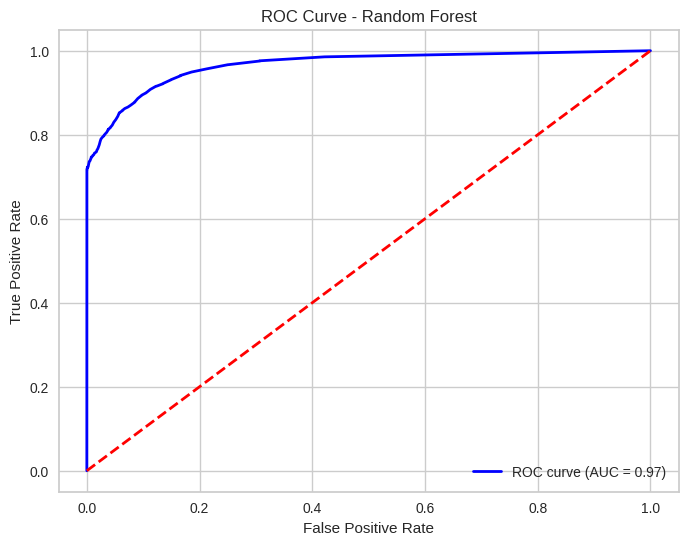

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_random_forest, tpr_random_forest, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_random_forest)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_random_forest, tpr_random_forest, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_random_forest)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


ImportError: cannot import name 'roc_auc_scor' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Performance Metrics for Support Vector Machine:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)


Performance Metrics for Support Vector Machine:
Accuracy: 0.9215417428397319
Precision: 0.9985443959243085
Recall: 0.4
F1-score: 0.5711906744379683


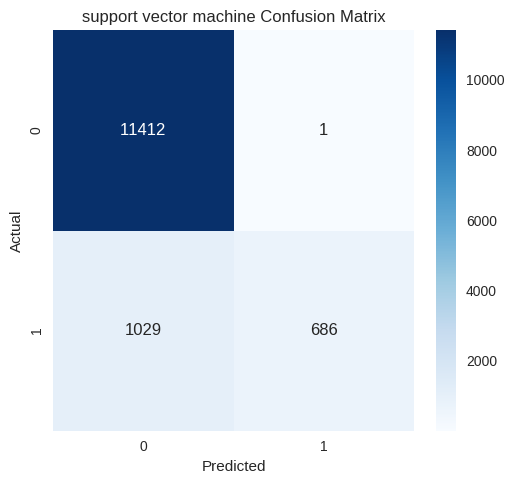

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.title('support vector machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

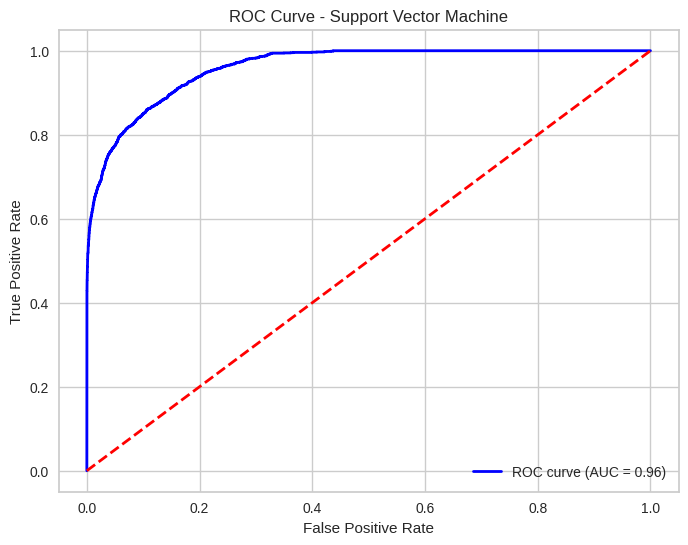

In [ ]:
y_prob_svm = svm.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay

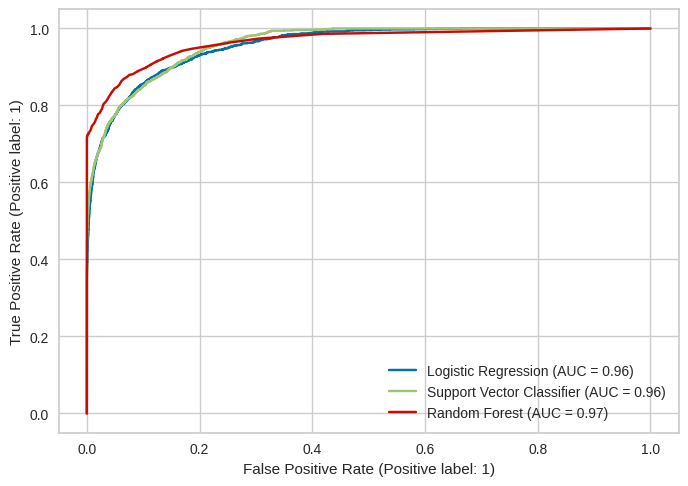

In [ ]:
ax = plt.gca()

LogReg = RocCurveDisplay.from_estimator(log_reg, X_test, y_test,
                                        ax=ax, name="Logistic Regression")
SVC = RocCurveDisplay.from_estimator(svm, X_test, y_test,
                                        ax=ax, name="Support Vector Classifier")
RandForest = RocCurveDisplay.from_estimator(random_forest, X_test, y_test,
                                        ax=ax, name="Random Forest")
plt.show()


Among the three algorithms, Random Forest appears to be the most suitable for the problem. It demonstrates the highest accuracy, precision, recall, and F1-score. Its ability to handle complex relationships in the data and reduce overfitting makes it a good choice for this task. Additionally, it requires less fine-tuning compared to Support Vector Machine and performs well even without extensive parameter tuning.

Challenges Faced:
1. **Data Preprocessing:** Dealing with categorical variables and missing values posed a challenge during data preprocessing.
2. **Model Selection:** Selecting the most appropriate machine learning algorithms for the task required careful consideration of the dataset's characteristics.
3. **Hyperparameter Tuning:** Fine-tuning hyperparameters for algorithms like Support Vector Machine and Random Forest was time-consuming and required experimentation.
4. **Performance Evaluation:** Choosing the right evaluation metrics and interpreting the results accurately was essential for assessing model performance effectively.

Solutions:
1. **Data Preprocessing:** Implemented one-hot encoding for categorical variables and handled missing values using appropriate techniques such as mean imputation or dropping rows/columns.
2. **Model Selection:** Explored different algorithms based on the dataset's size, complexity, and problem type. Selected Logistic Regression, Random Forest, and Support Vector Machine as they are suitable for classification tasks and widely used in practice.
3. **Hyperparameter Tuning:** Utilized techniques like grid search or random search to find optimal hyperparameters for Support Vector Machine and Random Forest. Additionally, employed cross-validation to ensure robustness of the models.
4. **Performance Evaluation:** Used a combination of evaluation metrics such as accuracy, precision, recall, and F1-score to comprehensively assess the models' performance. Visualized results using appropriate plots like confusion matrices and ROC curves for better interpretation.